In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ranksums, ttest_rel, wilcoxon
from IPython.display import display
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [2]:
# This folder is generated after running evaluate_test_set.py in the 'evaluation' folder of the project
TEST_PATH = Path('/home/suraj/Workspace/results/NKI/media_results/test_analysis').resolve()

In [3]:

# Metrics to evaluate statistical significance on
METRICS = {'mae_BODY': 'MAE (HU)', 'mse_BODY': 'MSE (HU^2)', 'psnr_BODY': 'PSNR (dB)', 'ssim_BODY':'SSIM index', 'nmse_BODY': 'NMSE'}

In [4]:
MODEL_DICT = {"baseline_2d": "2D CycleGAN", 
              "3d_vnet": "3D CycleGAN", 
              "revvnet": "3D RevGAN", 
              "ssim": "3D RevGAN + SSIM"
             }

def get_metric_across_models_as_df(path, metric):
    model_df = pd.DataFrame()
    
    for model, key in MODEL_DICT.items():
        model = path / model
        if not model.is_dir():
            continue
            
        metric_csv = model / "patient_metrics.csv"
        metrics_df = pd.read_csv(metric_csv)
        
        if 'Original' not in model_df.columns:
            model_df["Original"] = metrics_df[f'original_{metric}']
        
        model_df[key] = metrics_df[f'translated_{metric}']
        
    return model_df
            

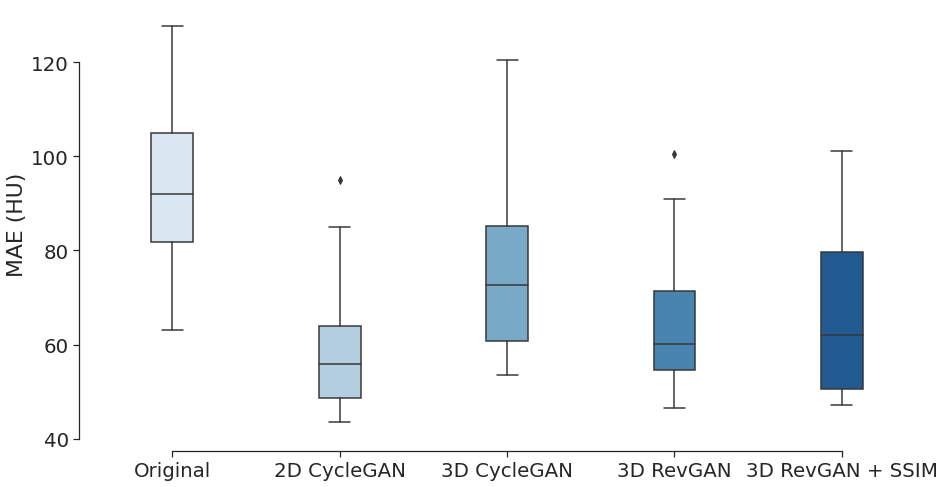

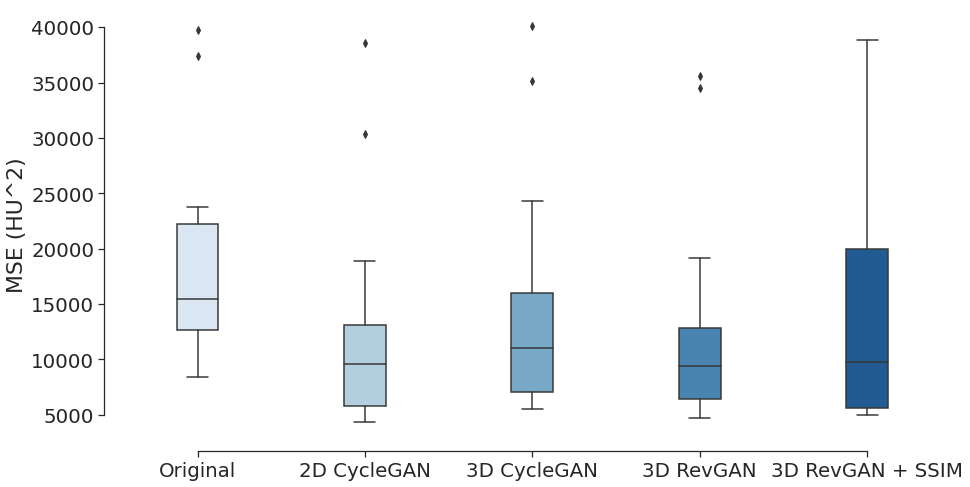

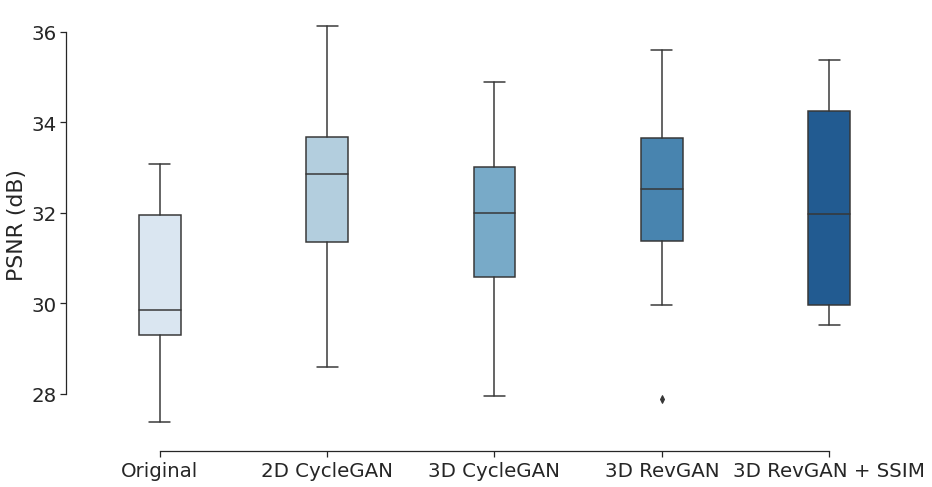

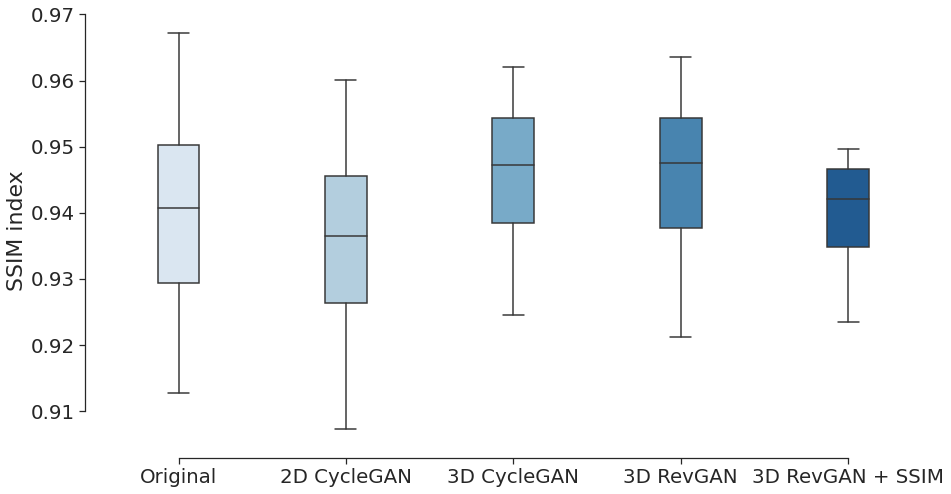

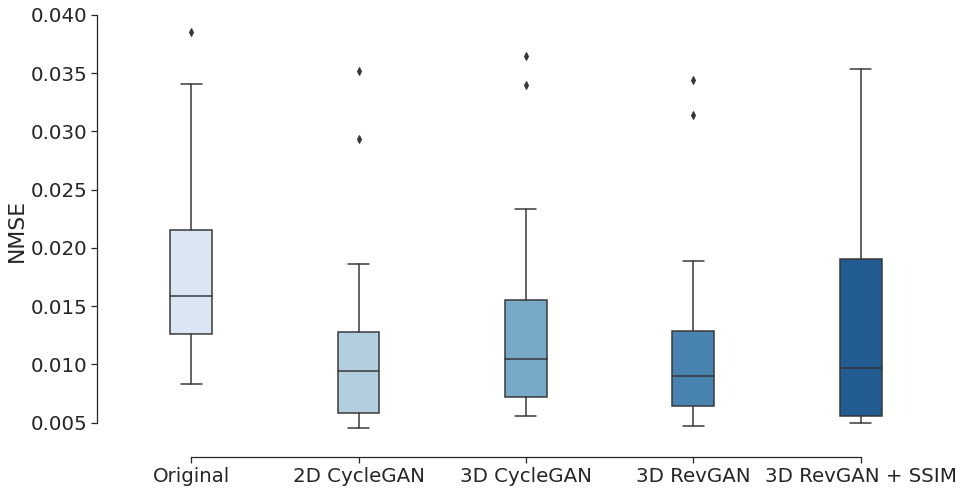

In [11]:
for metric, key in METRICS.items():
    f = plt.figure(figsize=(15, 8))

    metric_df = get_metric_across_models_as_df(TEST_PATH, metric)
    sns.set_style("ticks")

    
    sns.boxplot(data=metric_df, width=0.25, palette='Blues')
    sns.set(font_scale=1.8) 
    
    plt.ylabel(key, fontsize=22)
    plt.xticks(rotation=90)
    sns.despine(offset=10, trim=True)

    plt.show()

In [247]:
# artifact_data = pd.DataFrame()
artifact_data = {
    "2D CycleGAN": 6,
    "3D CycleGAN": 0,
    "3D RevGAN": 1,
    "3D RevGAN + SSIM": 1
}
# artifact_data = artifact_data.append(entry, ignore_index=True)

## Artifacts List

2D CycleGAN: 21602980, 21612478, 21615278, 21802689, 21807180, 21902070
3D CycleGAN: 
3D RevGAN: 21713533
3D RevGAN + SSIM: 21615278

In [248]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

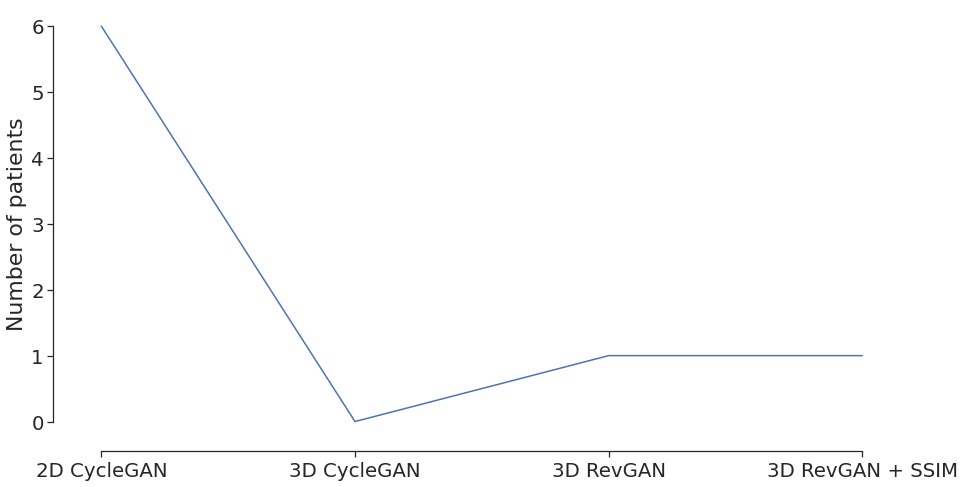

In [267]:
sns.set_style('white')
sns.set_theme(style="ticks")

fig, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(y=artifact_data.values(), x=artifact_data.keys(), palette='Blues', markers=True)
plt.ylabel('Number of patients', fontsize=22)

sns.set(font_scale=1.8) 
sns.despine(offset=10, trim=True)
plt.show()